<a href="https://colab.research.google.com/github/Arminsbss/tumor-classification/blob/main/tumor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/tumor dataset

/content/drive/MyDrive/Colab Notebooks/tumor dataset


In [ ]:
import numpy as np
import keras
from keras.preprocessing import image
from keras.applications import vgg16

In [ ]:
img = image.load_img("N (1).jpg")

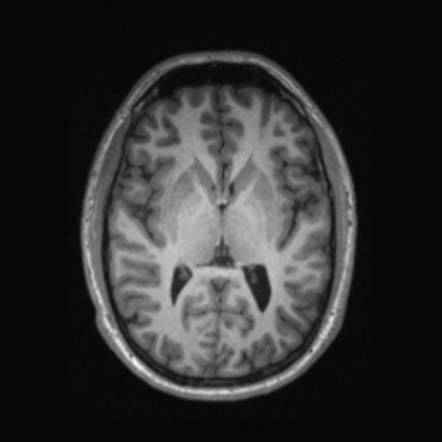

In [ ]:
display(img)

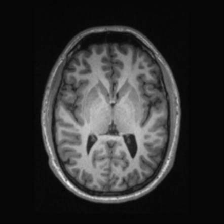

In [ ]:
img = image.load_img("N (1).jpg", target_size=(224, 224))
display(img)

In [ ]:
from tensorflow.tools.docs.doc_controls import T
from numpy.lib.function_base import append
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
tumor_no=[]
tumor_yes=[]
target=[]
for i in range(97):
  img = image.load_img("N ("+str(i+1)+").jpg")
  img = image.load_img("N ("+str(i+1)+").jpg", target_size=(224, 224))
  img = img_to_array(img)
  # prepare the image for the VGG model
  img = preprocess_input(img)
  tumor_no.append(img)
  target.append(0)
for i in range(155):
  img = image.load_img("Y ("+str(i+1)+").jpg")
  img = image.load_img("Y ("+str(i+1)+").jpg", target_size=(224, 224))
  img = img_to_array(img)
  # prepare the image for the VGG model
  img = preprocess_input(img)
  tumor_yes.append(img)
  target.append(1)
All_data=[]
All_data=tumor_no+tumor_yes
# for i in range(252):
#   All_data.insert(i,target[i])
print(len(tumor_no))
print(len(tumor_yes))

97
155


In [ ]:
All_data1=np.array(All_data)
target1=np.array(target)
randomize = np.arange(len(target1))
np.random.shuffle(randomize)
All_data1 = All_data1[randomize]
target1 = target1[randomize]

In [ ]:
#split train and test
train = All_data1[:-24]
test = All_data1[-24:]
train_lable = target1[:-24]
test_lable = target1[-24:]

In [ ]:
# for i in range(252):
#   All_data.insert(i,target[i])
# print(All_data[0])

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
modelVGG = VGG16(include_top=False, input_shape=(224, 224, 3))
modelVGG.layers.pop()
model = Sequential()
for layer in modelVGG.layers:
    model.add(layer)
keras.layers.Dropout(rate=0.1)
model.add(keras.layers.AveragePooling2D(pool_size=(7, 7), padding="valid"))
keras.layers.Dropout(rate=0.1)
model.add(Dense(1, activation= 'relu'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

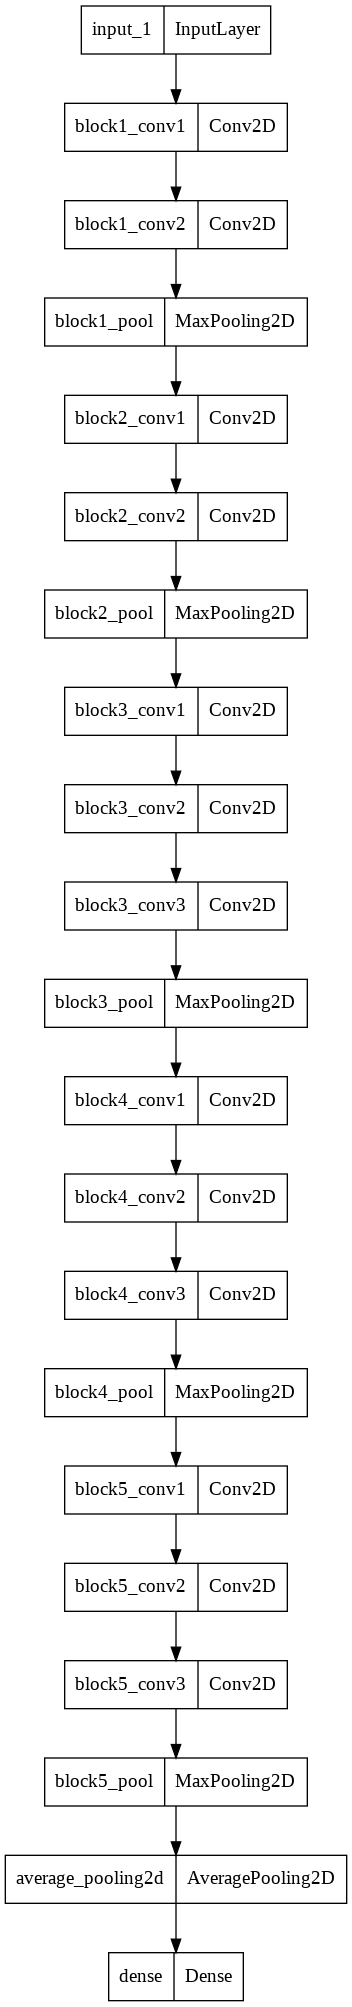

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='vgg.png')

In [ ]:
train_lable=train_lable.reshape(228,1, 1, 1)
# np.squeeze(x).shape
for layer in model.layers[0:19]:
  layer.trainable=False

In [ ]:
# model.fit({"inputs": train, "targets": train_lable}, epochs=10, validation_data=({'input': test, 'targets': test_lable}))

# model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
#     filepath="checkpoint_filepath",
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

checkpoint = keras.callbacks.ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  
filepath = 'my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
model.fit(x=train, y=train_lable, epochs=1,batch_size=1,validation_data=(test,test_lable))

228/228 [==============================] - 14s 40ms/step - loss: 5.7624 - accuracy: 0.6184 - val_loss: 7.6246 - val_accuracy: 0.5000


# **Image augumentation**

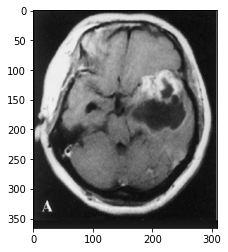

In [ ]:
import matplotlib.pyplot as plt
image = plt.imread("Y (2).jpg")
plt.imshow(image)

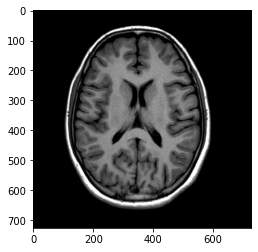

In [ ]:
import cv2
import glob
images=glob.glob("*.jpg")
for image_path in images:
  image=cv2.imread(image_path)
plt.imshow(image)
# cv2.imwrite('savedimage.png', image)    

In [ ]:
import imgaug.augmenters as iaa
# 2. Image Augmentation
# augmentation = iaa.Sequential([
augmentation = iaa.Fliplr(0.5)
# ])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


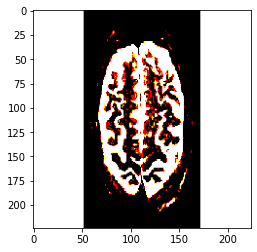

In [ ]:
# 3. Show Images
augmented_images = augmentation(images=All_data)
# for img in augmented_images:
plt.imshow(augmented_images[3])

In [ ]:
num=2000
for i in augmented_images:
  num+=1
  cv2.imwrite("N ("+str(num)+").png", i)    